In [51]:
import numpy as np
import matplotlib.pyplot as plt

In [52]:
N = 1000

In [53]:
ip = np.random.randn(N) > 0.5

ip = np.array(ip) 

In [54]:
s = 2 * ip - 1        

s = np.array(s) 

In [55]:
eb_no_db = np.arange(0,30) 

In [56]:
bit_error_rate_MMSE = np.zeros(len(eb_no_db)) 

In [57]:
def MMSE(): 

    for jj in range(len(eb_no_db)):  

        nErr = 0 
        
        received_bits_list = [] 

        for ii in range(N//2): 
            
            h11 = (1 / np.sqrt(2)) * (np.random.rand() + 1j * np.random.rand()) 
            
            h12 = (1 / np.sqrt(2)) * (np.random.rand() + 1j * np.random.rand())
            
            h21 = (1 / np.sqrt(2)) * (np.random.rand() + 1j * np.random.rand())
            
            h22 = (1 / np.sqrt(2)) * (np.random.rand() + 1j * np.random.rand())
            
            n1 = (1 / np.sqrt(2)) * (np.random.rand() + 1j * np.random.rand()) 
            
            n2 = (1 / np.sqrt(2)) * (np.random.rand() + 1j * np.random.rand()) 
            
            x1 = s[2 * ii] 
            
            x2 = s[2 * ii + 1] 
            

            H = np.array([[h11, h12], [h21, h22]]) 
            
            n = np.array([[n1], [n2]]) 
            
            x = np.array([[x1], [x2]])  

            Hx = np.matmul(H, x)    
            
            
            y = (1 / np.sqrt(2)) * Hx + n * (10 ** (-eb_no_db[jj] / 20)) 
            
           
            # Forming the MMSE equalization matrix W = inv(H^H*H+(1/snr)I)*H^H
           
            
            H_conjugate = np.conjugate(H) 
            
            H_Hermitian = np.transpose(H_conjugate)
    
            H_Hermitian_H = np.matmul(H_Hermitian,H)
        
            
            

            
            identity_matrix = np.eye(2)
        
            
            
            snr_inverse = (1 / (10 ** (-eb_no_db[jj] / 10)))
    
            H_Hermitian_H = H_Hermitian_H + snr_inverse * identity_matrix
            
            H_inverse = np.linalg.inv(H_Hermitian_H) 
            
            W = np.matmul(H_inverse, H_Hermitian)
            
            x_hat = np.matmul(W, y)
            
            received_bits = np.real(x_hat > 0)
            
#             received_bits_list.extend(received_bits.ravel())
 
            m = received_bits[0,0] 
                                   
            n = received_bits[1,0]
            
            received_bits_list.append(m) 
            
            received_bits_list.append(n)
        
        nErr = np.sum(ip != received_bits_list) 
        
        bit_error_rate_MMSE[jj] = nErr / N 
        
        
        
        

    return bit_error_rate_MMSE

[0.265 0.217 0.208 0.191 0.184 0.184 0.17  0.157 0.156 0.139 0.144 0.143
 0.127 0.139 0.144 0.119 0.115 0.111 0.117 0.113 0.114 0.113 0.107 0.107
 0.11  0.121 0.111 0.105 0.115 0.11 ]


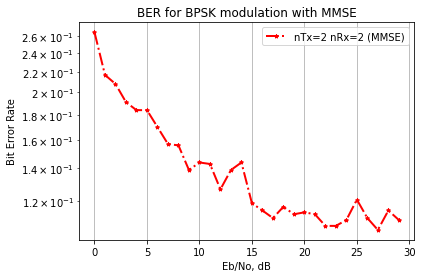

In [58]:
result_MMSE = MMSE()
print(result_MMSE)
plt.figure()
plt.semilogy(eb_no_db, result_MMSE, 'r*-.', linewidth=2, markersize=4, label='nTx=2 nRx=2 (MMSE)')
# plt.axis([0, 30, 1e-5, 0.1])
plt.grid(True)
plt.legend()
plt.xlabel('Eb/No, dB')
plt.ylabel('Bit Error Rate')
plt.title('BER for BPSK modulation with MMSE')
plt.show()

In [50]:
arr = np.array([[1, 2, 3, 4], 
                [5, 6, 7, 8], 
                [9, 10, 11, 12]])

In [22]:
arr[2,3]

12